# Unsupervised Learning and Principal Component Analysis

Unsupervised Learning only has features but no labels. This learning involves latent features which imply learning from hidden features which are not directly mentioned. Supervised Learning has Regression and Classification models. Unsupervised Learning has Clustering algorithms.

## Dataset

The [pendigits data](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) is a collection of handwritten digits, each described in terms of 16 (numerical) attributes.

The file `pendigits.csv` contains 10992 samples. There are 16 input attributes which are integers $x\in \{0, ..., 100\}$ and 1 class attribute which is the class code $c\in \{0, ..., 9\}$.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("pendigits.csv")
data, labels = df[df.columns.difference(['class'])], df['class']
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size


print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 10992; # features 16


## Principal Component Analysis (PCA)

Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset. Data visualization is the most common application of PCA. PCA is also used to make the training of an algorithm faster by reducing the number of dimensions of the data.

We can think of Principal Component analysis to be like fitting an n-dimensional ellipsoid to the data so that each axis of the ellipsoid represents a principal component. The larger the principal component axis the larger the variability in data it represents.

![image](https://www.askpython.com/wp-content/uploads/2020/10/Fitting-an-ellipse-to-data.jpg.webp)

### Exercise 1

Implement the PCA for the dataset on your own.

Steps to implement PCA in Python:

**Step 1.** Subtract the mean of each variable.

**Step 2.** Calculate the Covariance Matrix. You can know more about the covariance matrix in this really informative Wikipedia article [here](https://en.wikipedia.org/wiki/Covariance_matrix). *Hint* You may find [`numpy.cov()`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) method useful.

**Step 3.** Compute the Eigenvalues and Eigenvectors. *Hint* You may find [`numpy.linalg.eigh()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) method useful.

**Step 4** Sort Eigenvalues in descending order.

**Step 5** Select a subset from the rearranged Eigenvalue matrix.

**Step 6** Transform the data.

In [2]:
def PCA(X, n_components=2):
  # Subtract the mean of each variable from the dataset so that the dataset should
  # be centered on the origin.
  X_meaned = X - np.mean(data, axis=0)

  # calculating the covariance matrix of the mean-centered data.
  cov_mat = np.cov(X_meaned , rowvar = False)

  #Calculating Eigenvalues and Eigenvectors of the covariance matrix
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

  #sort the eigenvalues in descending order
  sorted_index = np.argsort(eigen_values)[::-1]
  
  sorted_eigenvalue = eigen_values[sorted_index]
  #similarly sort the eigenvectors 
  sorted_eigenvectors = eigen_vectors[:, sorted_index]

  # select the first n eigenvectors, n is desired dimension
  # of our final reduced data. 
  eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

  #Transform the data 
  X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
  
  return X_reduced


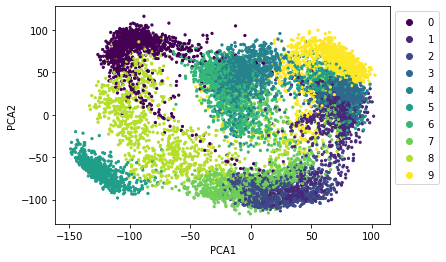

In [3]:
reduced_data = PCA(data, n_components=2)

# Plot reduced data with labels
s = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(*s.legend_elements(), bbox_to_anchor = (1 , 1))
plt.show()

## K-Means Clustering

K-Means is one of the most popular Unsupervised Machine Learning Algorithms Used for Solving Classification Problems. K-Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.

![image](https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png)

K-means Algorithm is an Iterative algorithm that divides a group of $n$ datasets into $k$ subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.


In [4]:
class KMeansCluster:
    def __init__(self, n_clusters, max_iter = 100, tolerance = 1e-3):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tolerance = tolerance

    def fit(self, X):
        centroids = np.random.rand(self.n_clusters,X.shape[1])
        centroids_old = centroids.copy()
        for iter_ in range(self.max_iter):
            dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in range(1,self.n_clusters):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroids_old) < self.tolerance:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self, X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for class_ in range(1, self.n_clusters):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes


In [15]:
k_means = KMeansCluster(n_clusters=n_digits, max_iter=10000)
k_means.fit(reduced_data)

In [16]:
# Step size of the mesh.
h = 0.2  # point in the mesh [x_min, x_max] x [y_min, y_max].
 
# Plot the decision boundary. For that, we will assign a color to each point in 
# a mesh.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

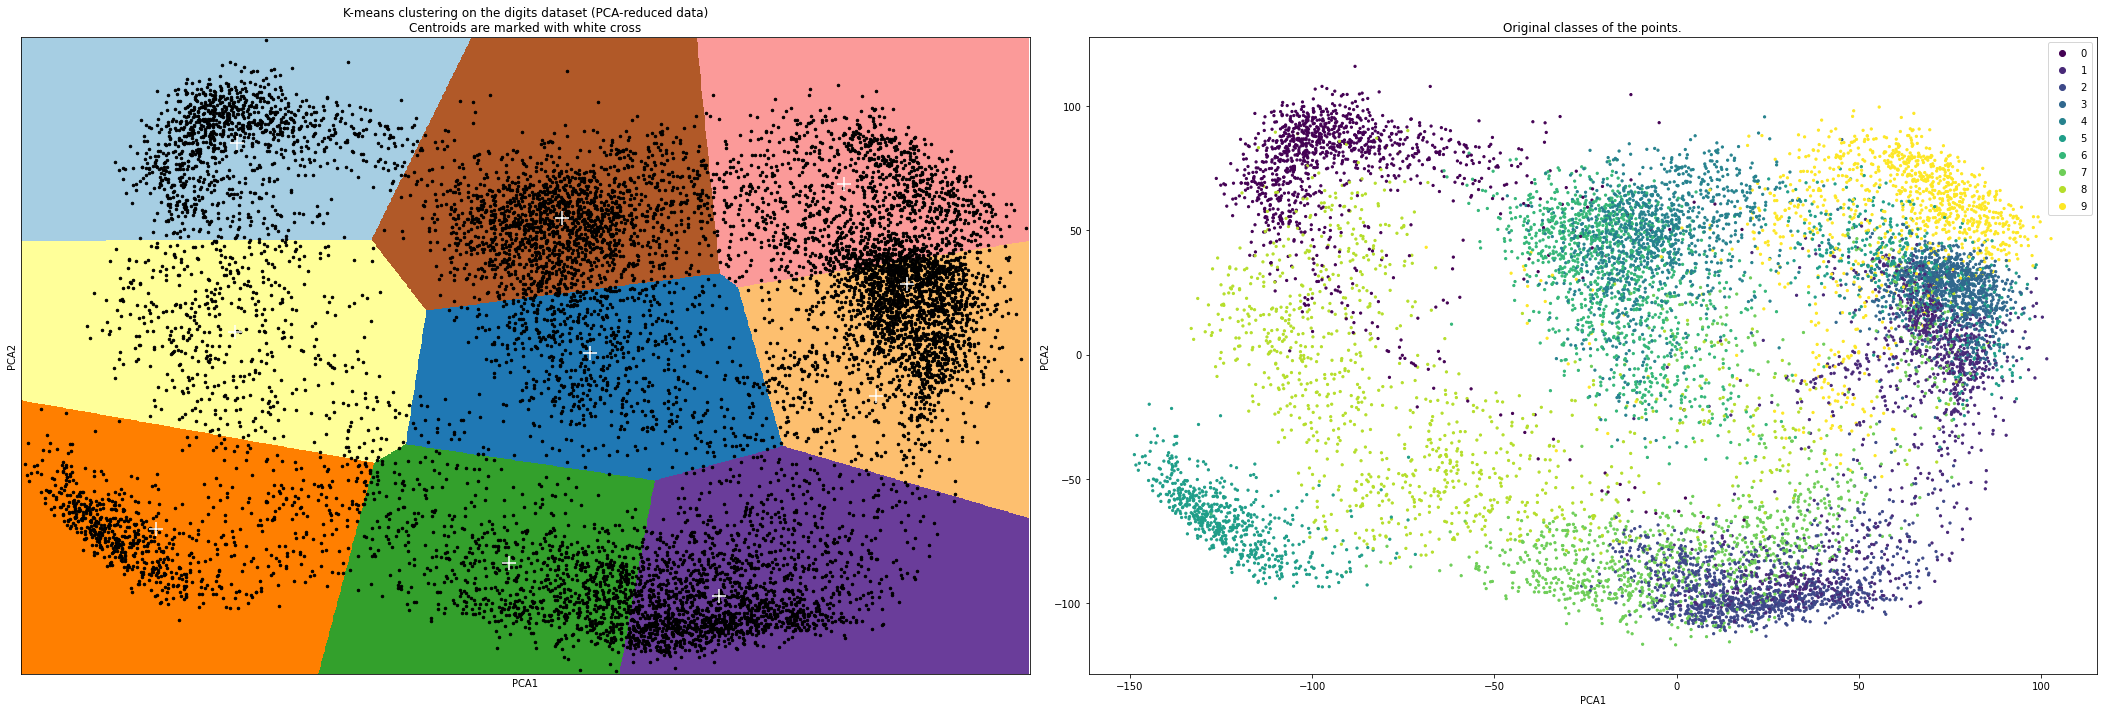

In [25]:
# Visualize the results on PCA-reduced data
plt.figure(1, figsize=(30, 10))
plt.clf()
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 2, 1)
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")


# Plot the centroids as a white X
centroids = k_means.centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="+",
    s=200,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.rcParams["figure.figsize"] = (10, 10)
s = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(*s.legend_elements(), bbox_to_anchor = (1 , 1))
plt.title(
    "Original classes of the points."
)
plt.show()

In [31]:
y_pred = pd.DataFrame(k_means.predict(reduced_data))

from sklearn.metrics import accuracy_score
score = accuracy_score(y_true=labels, y_pred=y_pred)
print(score)

0.10334788937409024


In [74]:
def calculate_misclassified(y_pred, labels):
  misclassified_clases = np.zeros(labels.unique().shape, dtype=int)
  count = 0
  for i in range(labels.shape[0]):
    if y_pred[0][i] != labels[i]:
      print("Instance: {}\nTrue Label: {}\nClassified as {}\n".format(i, labels[i], y_pred[0][i]))
      misclassified_clases[labels[i]] += 1
      count += 1

  print("Maximum misclassified label: {}\nNumber of instances misclassified: {}\n".format(misclassified_clases.argmax(), count))
  print("Misclassified labels:\n")
  for i in range(len(misclassified_clases)):
    print("{}:{}".format(i, misclassified_clases[i]))

In [75]:
calculate_misclassified(y_pred, labels)

Streaming output truncated to the last 5000 lines.

Instance: 9634
True Label: 5
Classified as 2

Instance: 9635
True Label: 4
Classified as 6

Instance: 9636
True Label: 0
Classified as 3

Instance: 9637
True Label: 9
Classified as 8

Instance: 9638
True Label: 1
Classified as 4

Instance: 9639
True Label: 3
Classified as 4

Instance: 9640
True Label: 5
Classified as 4

Instance: 9641
True Label: 8
Classified as 2

Instance: 9642
True Label: 0
Classified as 3

Instance: 9643
True Label: 3
Classified as 4

Instance: 9644
True Label: 4
Classified as 9

Instance: 9645
True Label: 5
Classified as 4

Instance: 9646
True Label: 2
Classified as 7

Instance: 9647
True Label: 1
Classified as 4

Instance: 9648
True Label: 2
Classified as 7

Instance: 9649
True Label: 5
Classified as 2

Instance: 9650
True Label: 6
Classified as 9

Instance: 9651
True Label: 8
Classified as 5

Instance: 9652
True Label: 7
Classified as 1

Instance: 9653
True Label: 3
Classified as 4

Instance: 9654
True Label: 0

###K-Means using Sklearn

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_digits)
kmeans.fit(reduced_data)
identified_clusters = pd.DataFrame(kmeans.predict(reduced_data))
print(accuracy_score(labels, identified_clusters))

0.14228529839883552


In [76]:
calculate_misclassified(identified_clusters, labels)

Streaming output truncated to the last 5000 lines.

Instance: 9534
True Label: 4
Classified as 1

Instance: 9535
True Label: 0
Classified as 3

Instance: 9536
True Label: 7
Classified as 8

Instance: 9537
True Label: 1
Classified as 2

Instance: 9538
True Label: 7
Classified as 8

Instance: 9539
True Label: 9
Classified as 7

Instance: 9540
True Label: 9
Classified as 7

Instance: 9541
True Label: 4
Classified as 1

Instance: 9542
True Label: 8
Classified as 0

Instance: 9543
True Label: 6
Classified as 1

Instance: 9544
True Label: 5
Classified as 7

Instance: 9545
True Label: 5
Classified as 4

Instance: 9546
True Label: 6
Classified as 1

Instance: 9547
True Label: 3
Classified as 7

Instance: 9548
True Label: 9
Classified as 7

Instance: 9549
True Label: 7
Classified as 8

Instance: 9550
True Label: 0
Classified as 3

Instance: 9551
True Label: 2
Classified as 8

Instance: 9552
True Label: 3
Classified as 4

Instance: 9553
True Label: 4
Classified as 1

Instance: 9554
True Label: 3

Text(0, 0.5, 'WCSS')

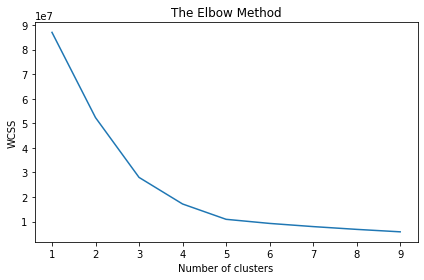

In [10]:
wcss=[]
for i in range(1, n_digits):
  kmeans = KMeans(i)
  kmeans.fit(reduced_data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1, n_digits)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

(1797, 64) (1797,)
3


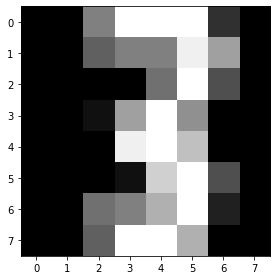

In [11]:
from sklearn.datasets import load_digits

(X,Y) = load_digits(return_X_y=True)
print(X.shape,Y.shape)

d1, d2 = 8, 8

i = np.random.randint(X.shape[0])
plt.imshow(np.reshape(X[i,:], (d1, d2)), cmap='gray')
print(Y[i])
plt.show()

(64, 64)


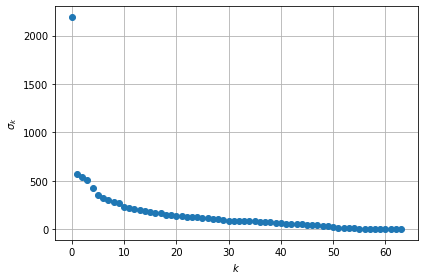

In [12]:
U, S, Vh = np.linalg.svd(X.T, full_matrices=False)

print(U.shape)

plt.plot(S, color='tab:blue', linestyle='none', marker='o')
plt.xlabel('$k$')
plt.ylabel('$\sigma_k$')
#plt.yscale('log')
plt.grid()
plt.show()

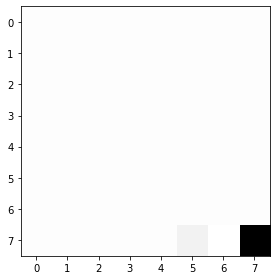

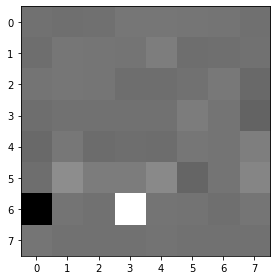

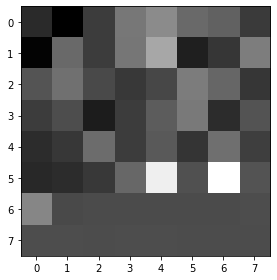

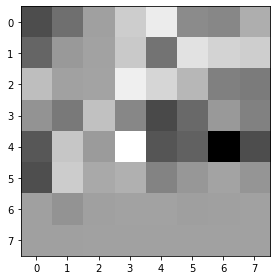

In [13]:
plt.imshow(np.reshape(U[0,:], (d1, d2)), cmap='gray')
plt.show()

plt.imshow(np.reshape(U[1,:], (d1, d2)), cmap='gray')
plt.show()

plt.imshow(np.reshape(U[2,:], (d1, d2)), cmap='gray')
plt.show()

plt.imshow(np.reshape(U[3,:], (d1, d2)), cmap='gray')
plt.show()